In [1]:
from numpy import loadtxt, round
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from LorisNet import *

In [2]:
# load data
dataset = loadtxt('./data/pima_indians_diabetes/pima-indians-diabetes.txt', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

X_train.shape

(514, 8)

In [3]:
data = tf.data.Dataset.from_tensor_slices((X_train,
                                           y_train)).batch(1000)

In [67]:
# Train LorisNet
model = tf.keras.Sequential()

nbr_masks = 4
steps = [[StepNoFeedback(AllOnesMaskedInputNoFeedback(nbr_masks),
                         LinearSeparators(),
                         PredictionNeurons(units=1))]]
for i in range(8):
    steps.append([StepWithFeedback(AllOnesMaskedInputWithFeedback(nbr_masks),
                                   LinearSeparators(),
                                   PredictionNeurons(units=1))])
steps = [item for sublist in steps for item in sublist]

model.add(LorisNetLayer(steps=steps,
                        weighted_addition=NormalizedWeightedAdd(),
                        activation='sigmoid'
                       ))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.00005),
              metrics=['accuracy']
             )

history = model.fit(X_train,
                    y_train,
                    validation_split=0.10,
                    epochs=1000,
                    verbose=0
                   )

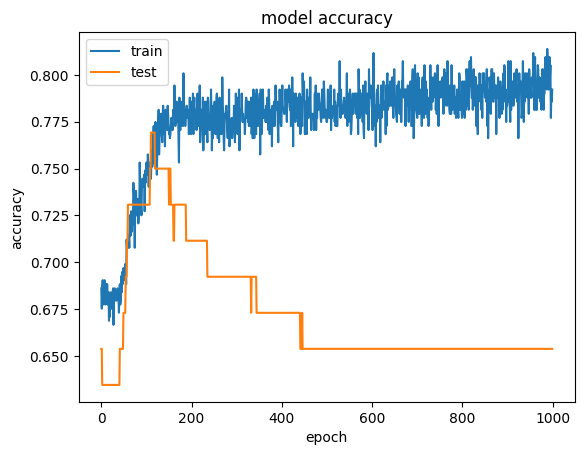

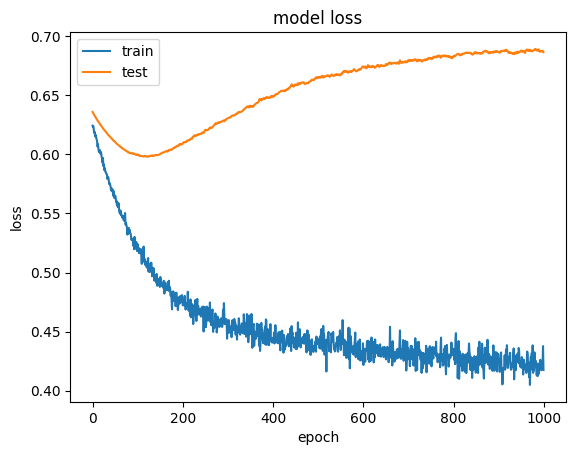

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

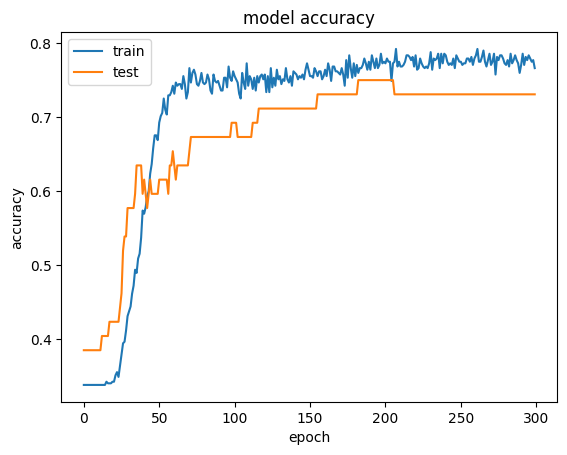

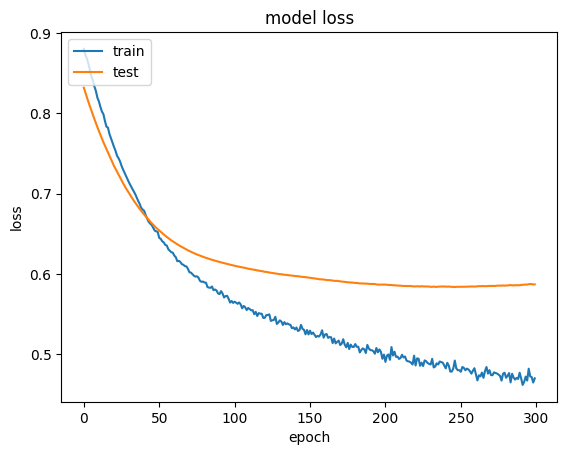

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
y_pred[:20]

8/8 [==============================] - 1s 3ms/step
Accuracy: 70.87%


array([[0.00847683],
       [0.57997644],
       [0.9970192 ],
       [0.03353631],
       [0.10248792],
       [0.08918484],
       [0.00163124],
       [0.5374942 ],
       [0.9833671 ],
       [0.06981006],
       [0.93649834],
       [0.09220025],
       [0.8998435 ],
       [0.98869616],
       [0.00522192],
       [0.10728393],
       [0.26533666],
       [0.62107664],
       [0.07161827],
       [0.8144481 ]], dtype=float32)

In [6]:
y_test[:20]

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0.])